In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

from matplotlib import pyplot as plt

### import dataset

In [3]:
train_data = pd.read_csv('../../../data/train.csv', index_col='id')
train_data.head()

,cat0,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,...,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,target
id,,,,,,,,,,,,,,,,,,,,,
1,A,B,A,A,B,D,A,E,C,I,...,0.881122,0.421650,0.741413,0.895799,0.802461,0.724417,0.701915,0.877618,0.719903,6.994023
2,B,A,A,A,B,B,A,E,A,F,...,0.440011,0.346230,0.278495,0.593413,0.546056,0.613252,0.741289,0.326679,0.808464,8.071256
3,A,A,A,C,B,D,A,B,C,N,...,0.914155,0.369602,0.832564,0.865620,0.825251,0.264104,0.695561,0.869133,0.828352,5.760456
4,A,A,A,C,B,D,A,E,G,K,...,0.934138,0.578930,0.407313,0.868099,0.794402,0.494269,0.698125,0.809799,0.614766,7.806457
6,A,B,A,A,B,B,A,E,C,F,...,0.382600,0.705940,0.325193,0.440967,0.462146,0.724447,0.683073,0.343457,0.297743,6.868974


In [4]:
cat_tb_data = train_data.select_dtypes(include=object)
cat_tb_data

,cat0,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9
id,,,,,,,,,,
1,A,B,A,A,B,D,A,E,C,I
2,B,A,A,A,B,B,A,E,A,F
3,A,A,A,C,B,D,A,B,C,N
4,A,A,A,C,B,D,A,E,G,K
6,A,B,A,A,B,B,A,E,C,F
...,...,...,...,...,...,...,...,...,...,...
499993,A,B,A,C,B,B,A,E,E,L
499996,A,B,A,C,B,B,A,E,E,L
499997,A,B,A,C,B,B,A,E,C,M


In [20]:
def class_balance(dtl):
    plt.figure(figsize=dtl['figsize'], dpi=dtl['dpi'])

    g = sns.countplot(x=cat_tb_data[dtl['feature']], color='#000')
    g.axhline(dtl['thresh'], color='#03A65A', ls='--', lw=3)

    plt.xlabel(dtl['xlabel'])
    plt.ylabel(dtl['ylabel'])
    plt.title(dtl['title'])
    plt.savefig(dtl['path'])
    plt.show()

In [7]:
def encoding_report(df):
    oh_encoded_feat_count = 0
    d_encoded_feat_count = 0

    for feat in df.columns:
        oh_encoded_feat_count += df[feat].nunique()
        d_encoded_feat_count += df[feat].nunique() - 1

    print(f'Hot-encoded feature count: {oh_encoded_feat_count}\n'
          f'Dummy encoded feature count: {d_encoded_feat_count}')

### cat0

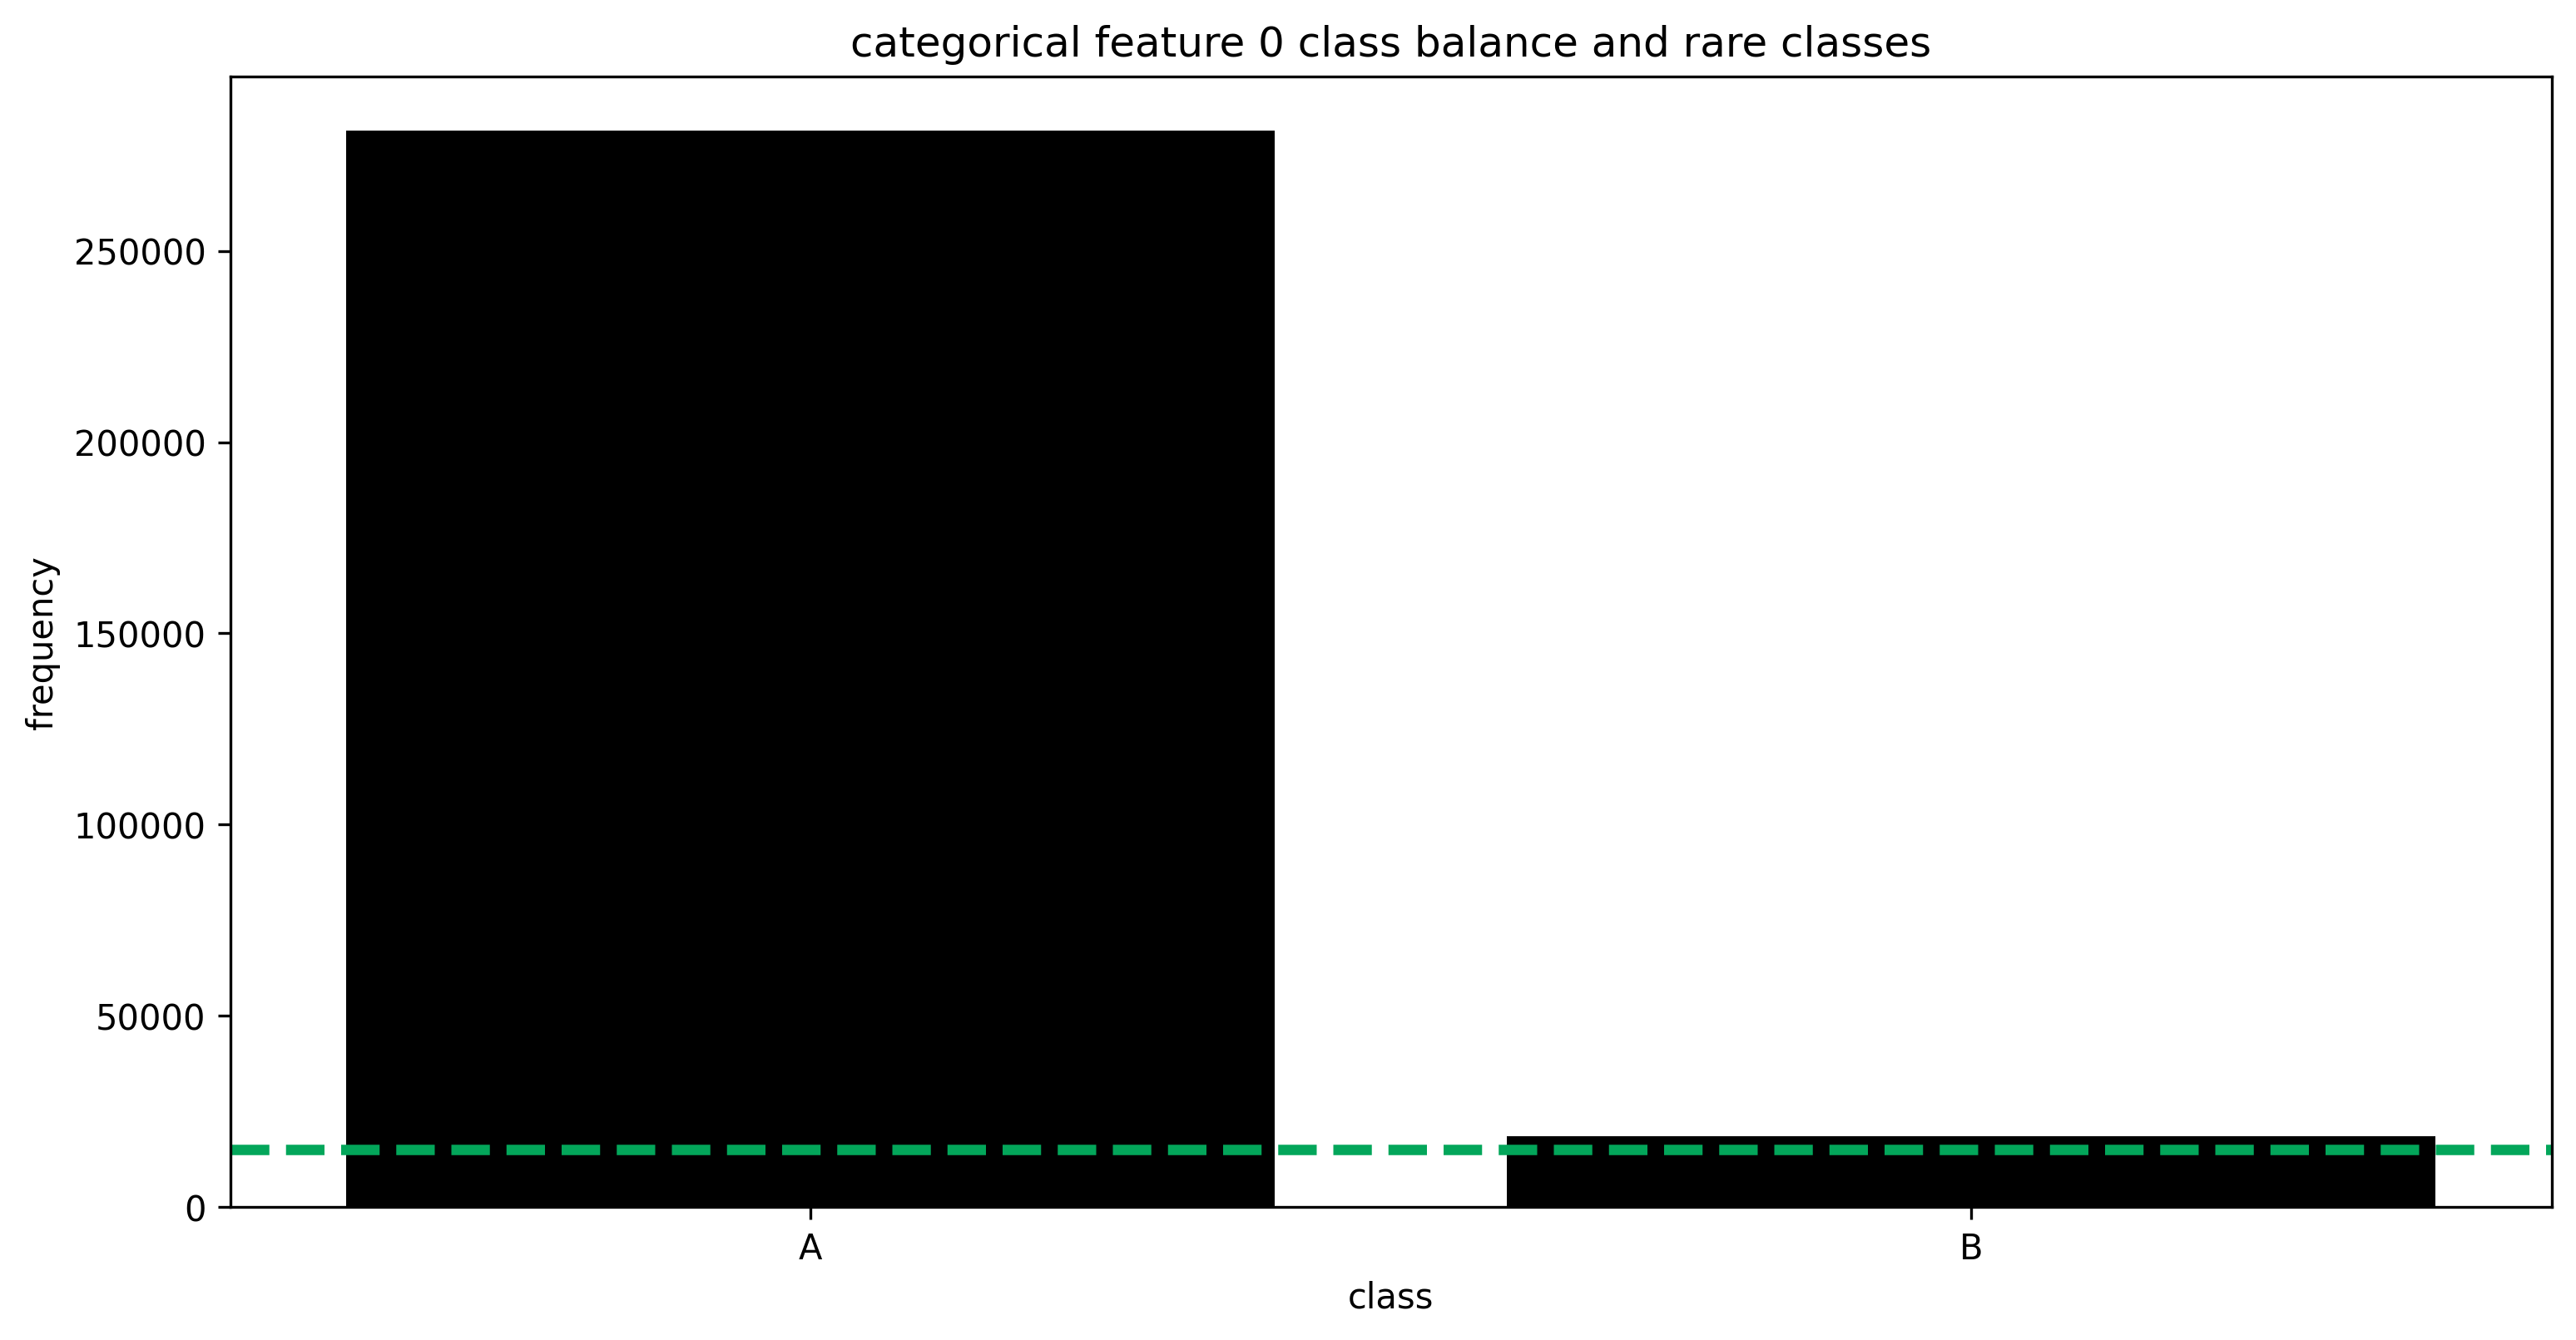

In [21]:
cat_0 = {'figsize': [12, 6],
         'dpi': 300,
         'feature': 'cat0',
         'thresh': cat_tb_data.shape[0] * 0.05,
         'xlabel': 'class',
         'ylabel': 'frequency',
         'title': "categorical feature 0 class balance and rare classes",
         'path': '../../../graphs/examine/cat_0_class.png'}

class_balance(cat_0)

In [22]:
encoding_report(cat_tb_data[['cat0']])

Hot-encoded feature count: 2
Dummy encoded feature count: 1
